In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataaset

dataset = pd.read_csv('personen_datensatz.csv', delimiter=';')  # Verwenden Sie den richtigen Pfad zur Datei
dataset.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,1,72.0,170.0,80,M.Eng.,blau,65k
1,2,25.0,197.0,107,B.A.,schwarz,65k
2,3,46.0,193.0,103,B.Sc.,NaN,65k
3,4,59.0,160.0,70,NaN,schwarz,30k
4,5,50.0,198.0,108,M.Sc.,gruen,60k


# Statiscs about the Dataset

In [4]:
dataset_count = dataset.count()
# Check for missing values
missing_vlaues_count = dataset.isnull().sum()
# Check for duplicates
duplicated_values_count = dataset.duplicated().sum()
# Check data types
data_typs = dataset.dtypes
print("Dataset Count:\n", dataset_count)
print("\nMissing Values Count:\n", missing_vlaues_count)
print("\nDuplicated Values Count:\n", duplicated_values_count)
print("\nData Types:\n", data_typs)

# Dataset description
dataset_description = dataset.describe()
print("\nDataset Description:\n", dataset_description)

# information about the non-numerical columns
non_numerical_info = dataset.select_dtypes(include=['object']).describe()
print("\nNon-Numerical Columns Information:\n", non_numerical_info)

Dataset Count:
 Person Nr.      1000
Alter            982
Groesse (cm)     985
Gewicht (kg)    1000
Abschluss        862
Augenfarbe       788
Einkommen        876
dtype: int64

Missing Values Count:
 Person Nr.        0
Alter            18
Groesse (cm)     15
Gewicht (kg)      0
Abschluss       138
Augenfarbe      212
Einkommen       124
dtype: int64

Duplicated Values Count:
 0

Data Types:
 Person Nr.        int64
Alter           float64
Groesse (cm)    float64
Gewicht (kg)      int64
Abschluss        object
Augenfarbe       object
Einkommen        object
dtype: object

Dataset Description:
         Person Nr.       Alter  Groesse (cm)  Gewicht (kg)
count  1000.000000  982.000000    985.000000   1000.000000
mean    500.500000   58.990835    179.894416     89.897000
std     288.819436   23.834182     18.054035     18.007461
min       1.000000   18.000000    150.000000     60.000000
25%     250.750000   39.000000    164.000000     74.000000
50%     500.500000   59.000000    179.000000 

# Visualaisation

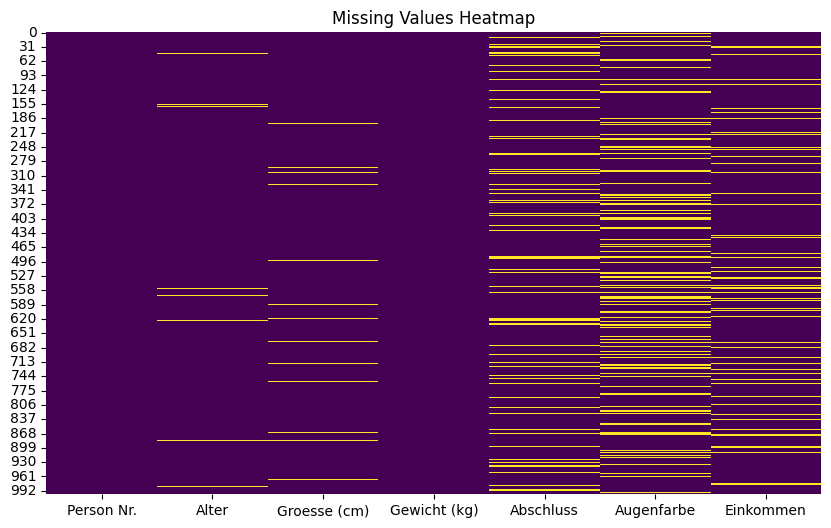

In [5]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


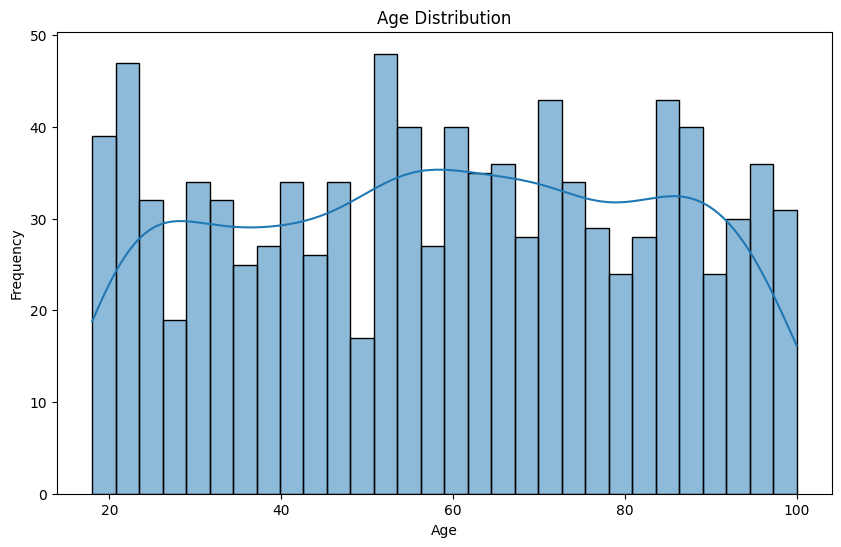

In [6]:
# Visualize the distribution of a specific column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Alter'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


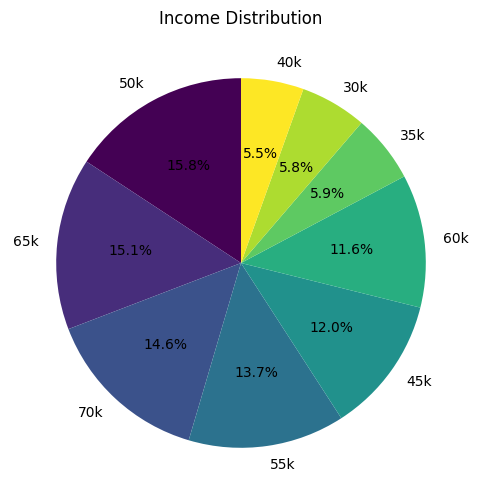

In [7]:
# Pie chart for income distribution
income_counts = dataset['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

In [8]:
# check the uniqe values of each categorical feature
categorical_columns = ['Abschluss', 'Augenfarbe', 'Einkommen']
for column in categorical_columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Abschluss': ['M.Eng.' 'B.A.' 'B.Sc.' nan 'M.Sc.' 'M.A.' 'B.Eng.']
Unique values in 'Augenfarbe': ['blau' 'schwarz' nan 'gruen' 'braun']
Unique values in 'Einkommen': ['65k' '30k' '60k' '50k' nan '55k' '45k' '40k' '35k' '70k']


# Data Preprocessing

## Data Transformation

In [87]:
dataset.head()
# remove personen Nr. column
dataset = dataset.drop(columns=['Person Nr.'])

In [9]:
# Before encoding, we need to delete rows with missing values in categorical columns
categorical_columns = ['Abschluss', 'Augenfarbe', 'Einkommen']
dataset = dataset.dropna(subset=categorical_columns)

#check if there are any missing values in the categorical columns after dropping rows
missing_values_after_drop = dataset[categorical_columns].isnull().sum()
print("\nMissing values in categorical columns after dropping rows:\n", missing_values_after_drop)


Missing values in categorical columns after dropping rows:
 Abschluss     0
Augenfarbe    0
Einkommen     0
dtype: int64


In [10]:
# Encoding categorical variables using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = onehot_encoder.fit_transform(dataset[categorical_columns])

# Convert the sparse matrix to a dense array
encoded_data = encoded_data.toarray()

# Create a DataFrame for the encoded data
encoded_columns = onehot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded data with the original dataset
dataset_encoded = pd.concat([dataset.reset_index(drop=True), encoded_df], axis=1)

# Drop the original categorical columns
dataset_encoded.drop(columns=categorical_columns, inplace=True)

dataset_encoded.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_schwarz,Einkommen_30k,Einkommen_35k,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
0,1,72.0,170.0,80,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,25.0,197.0,107,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,50.0,198.0,108,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,99.0,184.0,94,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7,41.0,185.0,95,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
print(dataset_encoded.shape)

(603, 23)


In [13]:
# 2. Behandlung fehlender Eingaben
# Check for missing values in the encoded dataset
missing_values_encoded = dataset_encoded.isnull().sum() 
print("\nMissing Values in Encoded Dataset:\n", missing_values_encoded)
# delete all rows with the missing vlaues(I think this is more accurate than filling the data with other tools)
dataset_encoded.dropna(inplace=True)    

missing_values_encoded = dataset_encoded.isnull().sum() 
print("\nMissing Values in Encoded Dataset:\n", missing_values_encoded)
print(dataset_encoded.shape)


Missing Values in Encoded Dataset:
 Person Nr.            0
Alter                 0
Groesse (cm)          0
Gewicht (kg)          0
Abschluss_B.A.        0
Abschluss_B.Eng.      0
Abschluss_B.Sc.       0
Abschluss_M.A.        0
Abschluss_M.Eng.      0
Abschluss_M.Sc.       0
Augenfarbe_blau       0
Augenfarbe_braun      0
Augenfarbe_gruen      0
Augenfarbe_schwarz    0
Einkommen_30k         0
Einkommen_35k         0
Einkommen_40k         0
Einkommen_45k         0
Einkommen_50k         0
Einkommen_55k         0
Einkommen_60k         0
Einkommen_65k         0
Einkommen_70k         0
dtype: int64

Missing Values in Encoded Dataset:
 Person Nr.            0
Alter                 0
Groesse (cm)          0
Gewicht (kg)          0
Abschluss_B.A.        0
Abschluss_B.Eng.      0
Abschluss_B.Sc.       0
Abschluss_M.A.        0
Abschluss_M.Eng.      0
Abschluss_M.Sc.       0
Augenfarbe_blau       0
Augenfarbe_braun      0
Augenfarbe_gruen      0
Augenfarbe_schwarz    0
Einkommen_30k         0
E

In [14]:
dataset_encoded.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_schwarz,Einkommen_30k,Einkommen_35k,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
0,1,72.0,170.0,80,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,25.0,197.0,107,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,50.0,198.0,108,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6,99.0,184.0,94,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7,41.0,185.0,95,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# 3. Feature Scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
skalierte_daten = minmax_scaler.fit_transform(dataset_encoded.values)
skalierte_daten = pd.DataFrame(skalierte_daten, columns=dataset_encoded.columns)
skalierte_daten.head(10)

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_schwarz,Einkommen_30k,Einkommen_35k,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
0,0.000000,0.658537,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001001,0.085366,0.783333,0.783333,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.004004,0.390244,0.800000,0.800000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.005005,0.987805,0.566667,0.566667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.006006,0.280488,0.583333,0.583333,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.012012,0.048780,0.233333,0.233333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.013013,0.646341,0.016667,0.016667,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.014014,0.951220,0.450000,0.450000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.015015,0.719512,0.683333,0.683333,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.016016,0.597561,0.166667,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Selection

In [16]:
skalierte_daten.describe()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_schwarz,Einkommen_30k,Einkommen_35k,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.494040,0.489141,0.493236,0.493236,0.167808,0.162671,0.162671,0.162671,0.190068,0.154110,...,0.220890,0.034247,0.049658,0.053082,0.138699,0.157534,0.142123,0.121575,0.155822,0.147260
std,0.294106,0.292521,0.297514,0.297514,0.374016,0.369382,0.369382,0.369382,0.392691,0.361363,...,0.415202,0.182018,0.217423,0.224390,0.345928,0.364616,0.349476,0.327075,0.362997,0.354669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233984,0.243902,0.233333,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.481982,0.487805,0.483333,0.483333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.754004,0.731707,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Konstante Merkmale 
schwellenwert = 1

konstante_merkmale = []

for merkmale in skalierte_daten.columns:
    prozentsatz_des_wertes = skalierte_daten[merkmale].loc[skalierte_daten[merkmale] == skalierte_daten[merkmale][0]].count() / skalierte_daten[merkmale].count()

    if prozentsatz_des_wertes >= 0.95:
        konstante_merkmale.append(merkmale)   

ohne_konstante_data = skalierte_daten.drop(labels=konstante_merkmale, axis=1)
ohne_konstante_data.describe()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_braun,Augenfarbe_gruen,Augenfarbe_schwarz,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.494040,0.489141,0.493236,0.493236,0.167808,0.162671,0.162671,0.162671,0.190068,0.154110,...,0.261986,0.260274,0.220890,0.053082,0.138699,0.157534,0.142123,0.121575,0.155822,0.147260
std,0.294106,0.292521,0.297514,0.297514,0.374016,0.369382,0.369382,0.369382,0.392691,0.361363,...,0.440092,0.439160,0.415202,0.224390,0.345928,0.364616,0.349476,0.327075,0.362997,0.354669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233984,0.243902,0.233333,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.481982,0.487805,0.483333,0.483333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.754004,0.731707,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Duplizierende Merkmale
daten_t = ohne_konstante_data.T

duplizierte_merkmale = daten_t[daten_t.duplicated()].index.values
print(duplizierte_merkmale)

ohne_duplizierte_daten = ohne_konstante_data.drop(labels=duplizierte_merkmale, axis=1)
ohne_duplizierte_daten.describe()

[]


,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,...,Augenfarbe_braun,Augenfarbe_gruen,Augenfarbe_schwarz,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.494040,0.489141,0.493236,0.493236,0.167808,0.162671,0.162671,0.162671,0.190068,0.154110,...,0.261986,0.260274,0.220890,0.053082,0.138699,0.157534,0.142123,0.121575,0.155822,0.147260
std,0.294106,0.292521,0.297514,0.297514,0.374016,0.369382,0.369382,0.369382,0.392691,0.361363,...,0.440092,0.439160,0.415202,0.224390,0.345928,0.364616,0.349476,0.327075,0.362997,0.354669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233984,0.243902,0.233333,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.481982,0.487805,0.483333,0.483333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.754004,0.731707,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
#pip install seaborn

<Axes: >

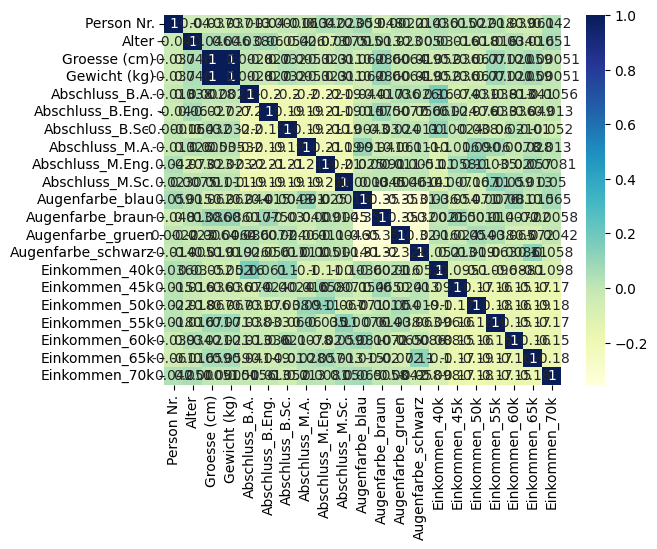

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson = ohne_duplizierte_daten.corr(method='pearson')

sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [ ]:
# 4. Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif        


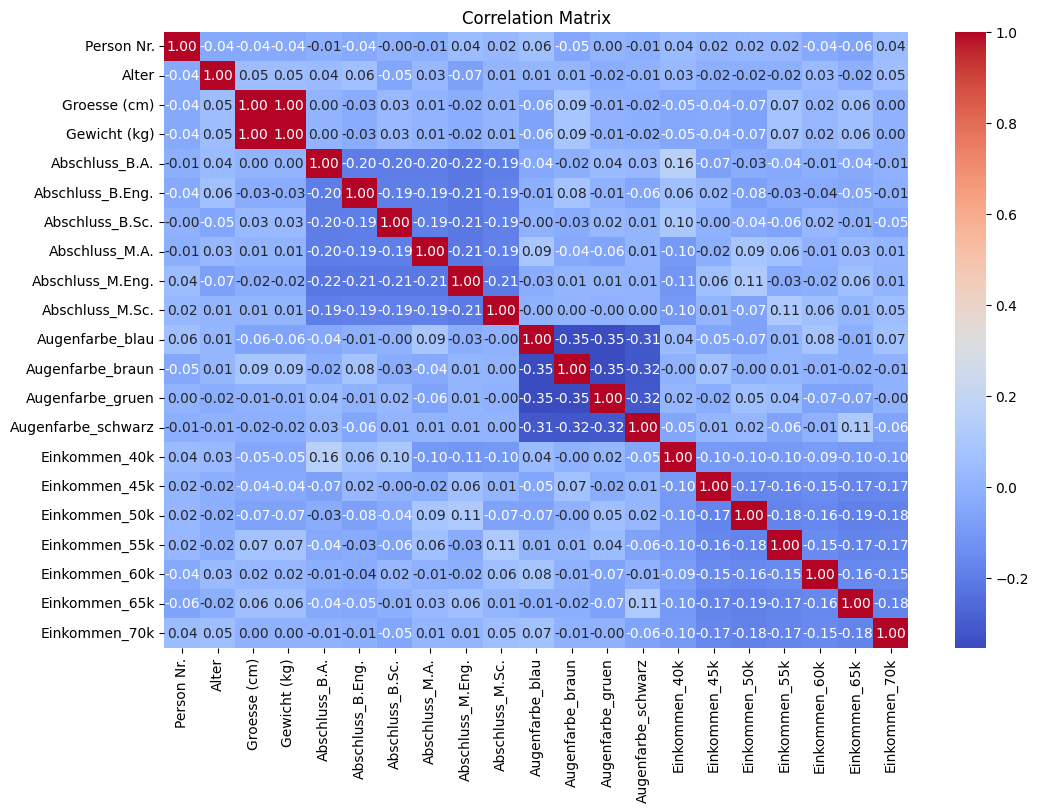

Highly Correlated Features (Threshold > 0.8): ['Person Nr.', 'Alter', 'Groesse (cm)', 'Gewicht (kg)', 'Abschluss_B.A.', 'Abschluss_B.Eng.', 'Abschluss_B.Sc.', 'Abschluss_M.A.', 'Abschluss_M.Eng.', 'Abschluss_M.Sc.', 'Augenfarbe_blau', 'Augenfarbe_braun', 'Augenfarbe_gruen', 'Augenfarbe_schwarz', 'Einkommen_40k', 'Einkommen_45k', 'Einkommen_50k', 'Einkommen_55k', 'Einkommen_60k', 'Einkommen_65k', 'Einkommen_70k']


In [21]:
# Calculate the Pearson correlation matrix
correlation_matrix = ohne_duplizierte_daten.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Select features with a high correlation threshold (e.g., > 0.8)
correlation_threshold = 0.8
high_correlation_features = correlation_matrix.columns[
    (correlation_matrix.abs() > correlation_threshold).any()
].tolist()

print("Highly Correlated Features (Threshold > 0.8):", high_correlation_features)

In [22]:
corr = ohne_duplizierte_daten.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [23]:
selected_columns = ohne_duplizierte_daten.columns[columns]
print(selected_columns.shape)
data = ohne_duplizierte_daten[selected_columns]
data.head()

(20,)


,Person Nr.,Alter,Groesse (cm),Abschluss_B.A.,Abschluss_B.Eng.,Abschluss_B.Sc.,Abschluss_M.A.,Abschluss_M.Eng.,Abschluss_M.Sc.,Augenfarbe_blau,Augenfarbe_braun,Augenfarbe_gruen,Augenfarbe_schwarz,Einkommen_40k,Einkommen_45k,Einkommen_50k,Einkommen_55k,Einkommen_60k,Einkommen_65k,Einkommen_70k
0,0.000000,0.658537,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.001001,0.085366,0.783333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.004004,0.390244,0.800000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.005005,0.987805,0.566667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.006006,0.280488,0.583333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
X.shape


(584, 13)

In [25]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop(columns=['Einkommen_40k', 'Einkommen_45k', 'Einkommen_50k', 'Einkommen_55k', 'Einkommen_60k', 'Einkommen_65k', 'Einkommen_70k'])
y = data[['Einkommen_40k', 'Einkommen_45k', 'Einkommen_50k', 'Einkommen_55k', 'Einkommen_60k', 'Einkommen_65k', 'Einkommen_70k']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (467, 13)
Testing Features Shape: (117, 13)
Training Target Shape: (467, 7)
Testing Target Shape: (117, 7)


In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.11965811965811966


In [113]:
#pip install graphviz
#pip install pydotplus


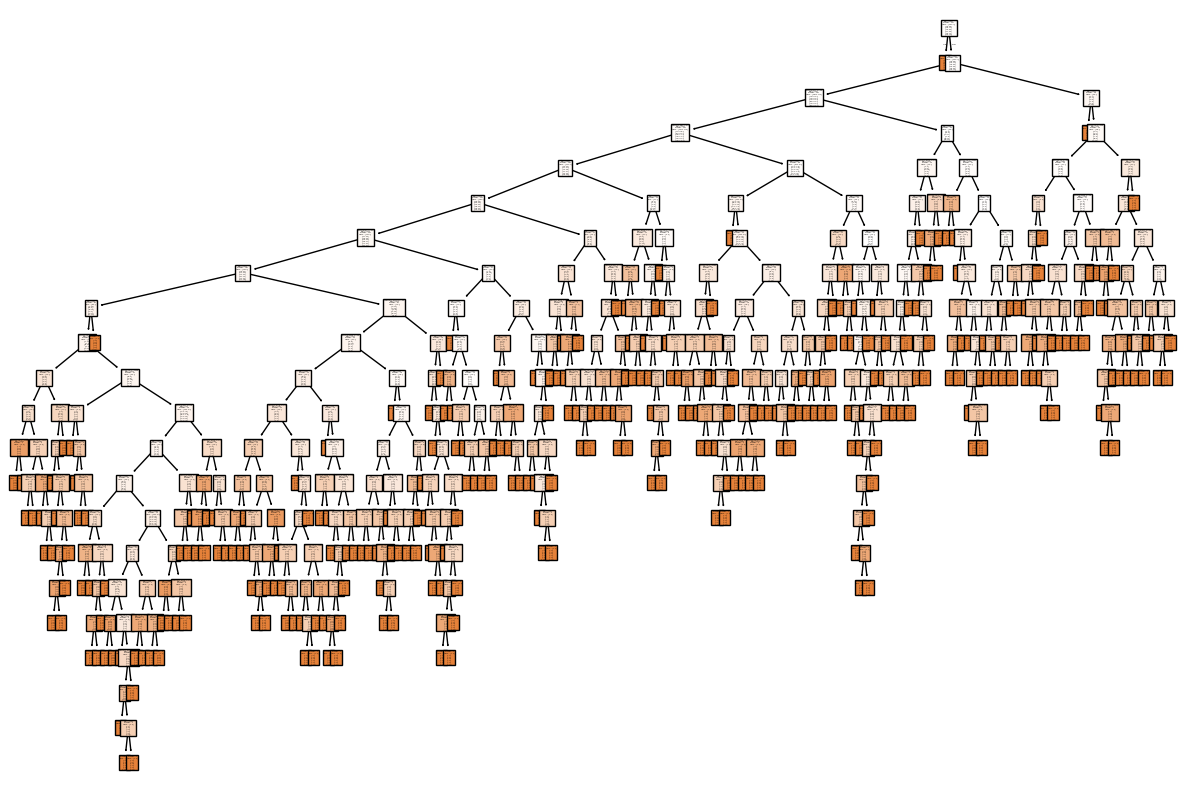

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=y_train.columns,
                   filled=True)

In [ ]:
# Using the grid search to find the best hyperparameters

Accuracy: 0.15384615384615385


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.15426675817890642
